In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import utils

In [2]:
#loading mnist dataset
mnist = tf.keras.datasets.mnist 

In [3]:
#dividing into train and test dataset
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

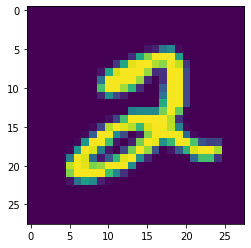

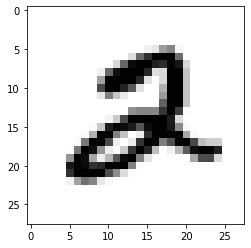

In [5]:
#Displaying the dataset
plt.imshow(x_train[5])
plt.show()
plt.imshow(x_train[5], cmap = plt.cm.binary)

In [6]:
#Checking value of each pixel before normalizing

## Grey level images varies from 0 to 255
print (x_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [7]:
# Normalizing grey images in range (0,1)
x_train = x_train/255
x_test = x_test/255

In [8]:
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [9]:
#resizing image for convolution operation
import numpy as np
img_size = 28
x_trainr = np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr = np.array(x_test).reshape(-1,img_size,img_size,1)
print("Training samples dimention: ",x_trainr.shape)
print("Testing samples dimention: ",x_testr.shape)

Training samples dimention:  (60000, 28, 28, 1)
Testing samples dimention:  (10000, 28, 28, 1)


In [10]:
#Applying CNN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

#First Convoluion Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu")) #drop values <0
model.add(MaxPooling2D(pool_size = (2,2))) #maxpooling single maximum value of 2x2 matrix

#Second Convoluion Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Third Convoluion Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size = (2,2)))

#Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully Connected Layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [13]:
print("Total Training Samples: ",len(x_trainr))

Total Training Samples:  60000


In [14]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

#Training model
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.2797 - accuracy: 0.9127 - val_loss: 0.1087 - val_accuracy: 0.9654
Epoch 2/5
1313/1313 [==============================] - 35s 26ms/step - loss: 0.0908 - accuracy: 0.9723 - val_loss: 0.0933 - val_accuracy: 0.9708
Epoch 3/5
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0661 - accuracy: 0.9797 - val_loss: 0.0725 - val_accuracy: 0.9779
Epoch 4/5
1313/1313 [==============================] - 36s 27ms/step - loss: 0.0522 - accuracy: 0.9833 - val_loss: 0.0655 - val_accuracy: 0.9811
Epoch 5/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0425 - accuracy: 0.9866 - val_loss: 0.0569 - val_accuracy: 0.9830


In [15]:
#Testing on dataset MNIT

test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples: ", test_loss)
print("Validation Acccuracy on 10,000 test samples: ", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0545 - accuracy: 0.9846
Test Loss on 10,000 test samples:  0.054549042135477066
Validation Acccuracy on 10,000 test samples:  0.9846000075340271


In [17]:
predictions = model.predict([x_testr])

In [18]:
print(predictions)

[[1.8023859e-07 1.8896083e-07 1.6091707e-06 ... 9.9999106e-01
  4.4455671e-08 5.4489951e-06]
 [2.1031501e-05 1.0144674e-05 9.9995816e-01 ... 2.5094844e-06
  6.5530239e-06 6.5385663e-08]
 [2.9505795e-04 9.9920493e-01 1.6642181e-04 ... 8.9987501e-05
  1.6073768e-04 1.2877392e-05]
 ...
 [8.1531750e-09 3.3526265e-11 2.4510441e-10 ... 1.9683097e-07
  1.1470861e-05 2.2298853e-05]
 [1.6722057e-05 2.3897585e-11 7.9420853e-10 ... 1.1077851e-08
  1.9187453e-06 1.0707563e-06]
 [5.4135697e-05 4.6790500e-08 1.6906681e-05 ... 7.5644842e-09
  8.0303515e-05 1.0528873e-06]]


1


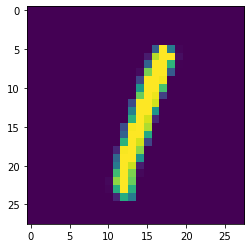

In [19]:
print(np.argmax(predictions[5])) 
plt.imshow(x_test[5])

9


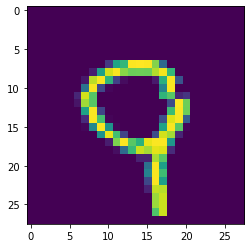

In [20]:
print(np.argmax(predictions[235])) 
plt.imshow(x_test[235])

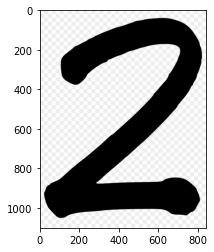

In [38]:
import matplotlib.pyplot as plt
import cv2 
img = cv2.imread('96-965294_2-hand-written-number-2.png')
plt.imshow(img)

In [39]:
img.shape

(1101, 840, 3)

In [40]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1101, 840)

In [41]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
resized.shape

(28, 28)

In [42]:
import tensorflow as tf
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [43]:
import numpy as np

# Assuming img_size is 28 for this example
img_size = 28
newimg = np.array(newimg).reshape(-1, img_size, img_size, 1)
newimg.shape

(1, 28, 28, 1)

In [44]:
import numpy as np

# Suppose you have a list of predicted values
predictions = [1,2,3]

# Find the index of the maximum value in the predictions list
max_index = np.argmax(predictions)

# Print the index of the maximum value
print(max_index)

2
